In [ ]:
# HR analytics : Job Change of Data Scientist

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aug_train.csv')

In [3]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [4]:
df.shape

(19158, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


# PERFORMING EXPLORATORY DATA ANALYSIS(EDA)

In [ ]:
# steps of EDA
    # missing values               
    # outlier treatment             
    # label encoding                
    # feature scaling               
    # handling imbalance dataset 

# MISSING VALUES

In [7]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
"""
            missing data
4508/19158    23.53%      gender
386/19158       2%        enrolled_university
460/19158      2.4%       education_level
2813/19158    14.68%      major_discipline
65/19158       0.3%       experience
5938/19158    30.99%      company_size
6140/19158     32%        company_type
423/19158      2.2%       last_new_job

----> company_size and company_type has more than 25% of missing data

"""

In [8]:
# column enrollee_id, city, company_size, company_type is removed from the dataset

df.drop(df.columns[[0, 1, 9, 10]], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  14650 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     18772 non-null  object 
 4   education_level         18698 non-null  object 
 5   major_discipline        16345 non-null  object 
 6   experience              19093 non-null  object 
 7   last_new_job            18735 non-null  object 
 8   training_hours          19158 non-null  int64  
 9   target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.5+ MB


In [10]:
print(df.gender.unique())
print("####################################")
print(df.gender.value_counts())
print("####################################")
print("Gender missing values :",df.gender.isna().sum())

['Male' nan 'Female' 'Other']
####################################
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
####################################
Gender missing values : 4508


In [10]:
df.gender.mode()

0    Male
dtype: object

In [11]:
df['gender'].fillna("Male",inplace = True)

In [12]:
print(df.gender.unique())
print("####################################")
print(df.gender.value_counts())
print("####################################")
print("Gender missing values :",df.gender.isna().sum())

['Male' 'Female' 'Other']
####################################
Male      17729
Female     1238
Other       191
Name: gender, dtype: int64
####################################
Gender missing values : 0


In [13]:
print(df.enrolled_university.unique())
print("####################################")
print(df.enrolled_university.value_counts())
print("####################################")
print("enrolled_university missing values :",df.enrolled_university.isna().sum())

['no_enrollment' 'Full time course' nan 'Part time course']
####################################
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
####################################
Gender missing values : 386


In [14]:
df['enrolled_university'].fillna("no_enrollment",inplace = True)

In [15]:
print(df.enrolled_university.unique())
print("####################################")
print(df.enrolled_university.value_counts())
print("####################################")
print("enrolled_university missing values :",df.enrolled_university.isna().sum())

['no_enrollment' 'Full time course' 'Part time course']
####################################
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
####################################
Gender missing values : 0


In [16]:
print(df.education_level.unique())
print("####################################")
print(df.education_level.value_counts())
print("####################################")
print("education_level missing values :",df.education_level.isna().sum())

['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
####################################
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
####################################
Gender missing values : 460


In [17]:
df['education_level'].fillna("Graduate",inplace = True)

In [18]:
print(df.education_level.unique())
print("####################################")
print(df.education_level.value_counts())
print("####################################")
print("education_level missing values :",df.education_level.isna().sum())

['Graduate' 'Masters' 'High School' 'Phd' 'Primary School']
####################################
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
####################################
Gender missing values : 0


In [19]:
print(df.major_discipline.unique())
print("####################################")
print(df.major_discipline.value_counts())
print("####################################")
print("major_discipline missing values :",df.major_discipline.isna().sum())

['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
####################################
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
####################################
Gender missing values : 2813


In [20]:
df['major_discipline'].fillna("STEM",inplace = True)

In [21]:
print(df.major_discipline.unique())
print("####################################")
print(df.major_discipline.value_counts())
print("####################################")
print("major_discipline missing values :",df.major_discipline.isna().sum())

['STEM' 'Business Degree' 'Arts' 'Humanities' 'No Major' 'Other']
####################################
STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
####################################
Gender missing values : 0


In [22]:
print(df.experience.unique())
print("####################################")
print(df.experience.value_counts())
print("####################################")
print("experience missing values :",df.experience.isna().sum())

['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
####################################
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64
####################################
Gender missing values : 65


In [23]:
df['experience'].fillna(">20",inplace = True)

In [24]:
print(df.experience.unique())
print("####################################")
print(df.experience.value_counts())
print("####################################")
print("experience missing values :",df.experience.isna().sum())

['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20']
####################################
>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64
####################################
Gender missing values : 0


In [27]:
print(df.last_new_job.unique())
print("####################################")
print(df.last_new_job.value_counts())
print("####################################")
print("last_new_job missing values :",df.last_new_job.isna().sum())

['1' '>4' 'never' '4' '3' '2']
####################################
1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64
####################################
Gender missing values : 0


In [25]:
df['last_new_job'].fillna("1",inplace = True)

In [28]:
print(df.last_new_job.unique())
print("####################################")
print(df.last_new_job.value_counts())
print("####################################")
print("last_new_job missing values :",df.last_new_job.isna().sum())

['1' '>4' 'never' '4' '3' '2']
####################################
1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64
####################################
Gender missing values : 0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  19158 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     19158 non-null  object 
 4   education_level         19158 non-null  object 
 5   major_discipline        19158 non-null  object 
 6   experience              19158 non-null  object 
 7   last_new_job            19158 non-null  object 
 8   training_hours          19158 non-null  int64  
 9   target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.5+ MB


In [29]:
print("Gender              : ",df.gender.unique())
print("relevent_experience : ",df.relevent_experience.unique())
print("enrolled_university : ",df.enrolled_university.unique())
print("education_level     : ",df.education_level.unique())
print("major_discipline    : ",df.major_discipline.unique())
print("experience          : ",df.experience.unique())
print("last_new_job        : ",df.last_new_job.unique())

Gender              :  ['Male' 'Female' 'Other']
relevent_experience :  ['Has relevent experience' 'No relevent experience']
enrolled_university :  ['no_enrollment' 'Full time course' 'Part time course']
education_level     :  ['Graduate' 'Masters' 'High School' 'Phd' 'Primary School']
major_discipline    :  ['STEM' 'Business Degree' 'Arts' 'Humanities' 'No Major' 'Other']
experience          :  ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20']
last_new_job        :  ['1' '>4' 'never' '4' '3' '2']


In [ ]:
# steps of EDA
    # missing values                : No missing values
    # outlier treatment             : As it is classification problem NO outlier treatment
    # label encoding                : -
    # feature scaling               : -
    # handling imbalance dataset    : -

In [ ]:
# for experience and last_new_job the numbers are in character type so the are going to be converted into number(int64)

# LABEL ENCODING

In [30]:
df['experience'] = df.experience.replace({'>20':21,"<1":0})

print(type(df['experience'][1]))
df['experience'] = df.experience.astype('int64')
print("#########################################")
print(type(df['experience'][1]))

<class 'str'>
#########################################
<class 'numpy.int64'>


In [31]:
df['last_new_job'] = df.last_new_job.replace({'>4':5,"never":0})

print(type(df['last_new_job'][0]))
df['last_new_job'] = df.last_new_job.astype('int64')
print("#########################################")
print(type(df['last_new_job'][0]))

<class 'str'>
#########################################
<class 'numpy.int64'>


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  19158 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     19158 non-null  object 
 4   education_level         19158 non-null  object 
 5   major_discipline        19158 non-null  object 
 6   experience              19158 non-null  int64  
 7   last_new_job            19158 non-null  int64  
 8   training_hours          19158 non-null  int64  
 9   target                  19158 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.5+ MB


In [38]:
df.experience.unique()

array([21, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8, 20], dtype=int64)

In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
 
df['gender']= label_encoder.fit_transform(df['gender'])
df['relevent_experience']= label_encoder.fit_transform(df['relevent_experience'])
df['enrolled_university']= label_encoder.fit_transform(df['enrolled_university'])
df['education_level']= label_encoder.fit_transform(df['education_level'])
df['major_discipline']= label_encoder.fit_transform(df['major_discipline'])

In [34]:
print("Gender              : ",df.gender.unique())
print("relevent_experience : ",df.relevent_experience.unique())
print("enrolled_university : ",df.enrolled_university.unique())
print("education_level     : ",df.education_level.unique())
print("major_discipline    : ",df.major_discipline.unique())
print("experience          : ",df.experience.unique())
print("last_new_job        : ",df.last_new_job.unique())

Gender              :  [1 0 2]
relevent_experience :  [0 1]
enrolled_university :  [2 0 1]
education_level     :  [0 2 1 3 4]
major_discipline    :  [5 1 0 2 3 4]
experience          :  [21 15  5  0 11 13  7 17  2 16  1  4 10 14 18 19 12  3  6  9  8 20]
last_new_job        :  [1 5 0 4 3 2]


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  19158 non-null  int32  
 2   relevent_experience     19158 non-null  int32  
 3   enrolled_university     19158 non-null  int32  
 4   education_level         19158 non-null  int32  
 5   major_discipline        19158 non-null  int32  
 6   experience              19158 non-null  int64  
 7   last_new_job            19158 non-null  int64  
 8   training_hours          19158 non-null  int64  
 9   target                  19158 non-null  float64
dtypes: float64(2), int32(5), int64(3)
memory usage: 1.1 MB


In [50]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,0.920,1,0,2,0,5,21,1,36,1.0
1,0.776,1,1,2,0,5,15,5,47,0.0
2,0.624,1,1,0,0,5,5,0,83,0.0
3,0.789,1,1,2,0,1,0,0,52,1.0
4,0.767,1,0,2,2,5,21,4,8,0.0


In [36]:
df = pd.get_dummies(df, columns = ['gender','relevent_experience','enrolled_university',
                                                     'education_level','major_discipline'])
df.head()

,city_development_index,experience,last_new_job,training_hours,target,gender_0,gender_1,gender_2,relevent_experience_0,relevent_experience_1,...,education_level_1,education_level_2,education_level_3,education_level_4,major_discipline_0,major_discipline_1,major_discipline_2,major_discipline_3,major_discipline_4,major_discipline_5
0,0.920,21,1,36,1.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.776,15,5,47,0.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.624,5,0,83,0.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.789,0,0,52,1.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.767,21,4,8,0.0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [37]:
df.shape

(19158, 24)

In [48]:
a = 0
for i in df.columns:
    print(f'{a}, {i}')
    a += 1

0, city_development_index
1, experience
2, last_new_job
3, training_hours
4, target
5, gender_1
6, gender_2
7, relevent_experience_1
8, enrolled_university_1
9, enrolled_university_2
10, education_level_1
11, education_level_2
12, education_level_3
13, education_level_4
14, major_discipline_1
15, major_discipline_2
16, major_discipline_3
17, major_discipline_4
18, major_discipline_5


In [47]:
df.drop(df.columns[[5,8,10,13,18]], axis = 1, inplace = True)

In [ ]:
# steps of EDA
    # missing values                : No missing values
    # outlier treatment             : As it is classification problem NO outlier treatment
    # label encoding                : Label encoding done
    # feature scaling               : -
    # handling imbalance dataset    : -

# IMBALANCE DATASET

C:\Users\Aditya Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


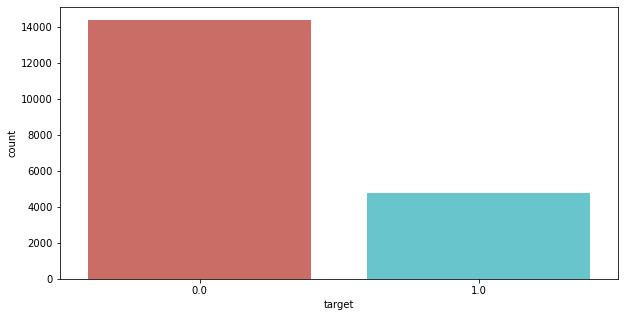

In [94]:
plt.figure(figsize =(10, 5))
sns.countplot(df.target,palette='hls')
plt.show()

In [50]:
df.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [58]:
4777*2

9554

In [ ]:
# minority * 2 <= majority , Hence it is imbalance dataset

In [51]:
X = df
X = X.drop('target',1)
y = df['target'].values

In [54]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

C:\Users\Aditya Mathew\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


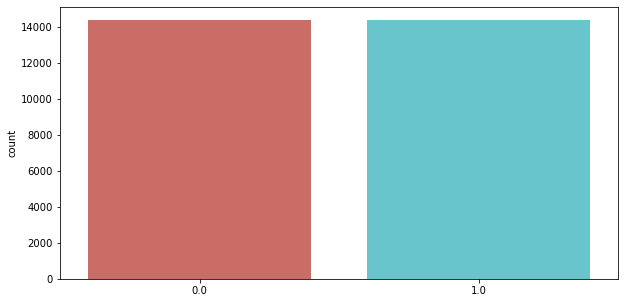

In [75]:
plt.figure(figsize =(10, 5))
sns.countplot(y_smote,palette='hls')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.25, random_state = 0)

In [56]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

21571 7191 21571 7191


# FEATURE SCALING

In [57]:
from sklearn.preprocessing import StandardScaler
std_X = StandardScaler()
X_train = std_X.fit_transform(X_train)
X_test = std_X.transform(X_test)

In [58]:
X_train

array([[-1.40544209, -0.6474073 , -1.12214026, ..., -0.0901775 ,
        -0.11795356,  0.34159155],
       [ 0.84134382, -1.24049225, -0.50488443, ..., -0.0901775 ,
        -0.11795356, -2.9274729 ],
       [ 0.89960179,  1.57666124,  0.11237141, ..., -0.0901775 ,
        -0.11795356,  0.34159155],
       ...,
       [ 0.89960179, -0.49913607, -1.12214026, ..., -0.0901775 ,
        -0.11795356,  0.34159155],
       [-1.40544209, -1.09222101, -0.50488443, ..., -0.0901775 ,
        -0.11795356,  0.34159155],
       [ 0.82172869,  0.39049135, -0.50488443, ..., -0.0901775 ,
        -0.11795356,  0.34159155]])

# MODEL BUILDING

## LOGISTIC REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression
LogReg_model = LogisticRegression(random_state = 0)

In [60]:
LogReg_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [61]:
LogReg_model.score(X_test,y_test)

0.738840216937839

In [62]:
y_predict_LogReg = LogReg_model.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix
cm_LogReg = confusion_matrix(y_test, y_predict_LogReg)
cm_LogReg

array([[2668,  857],
       [1021, 2645]], dtype=int64)

Text(69.0, 0.5, 'Truth')

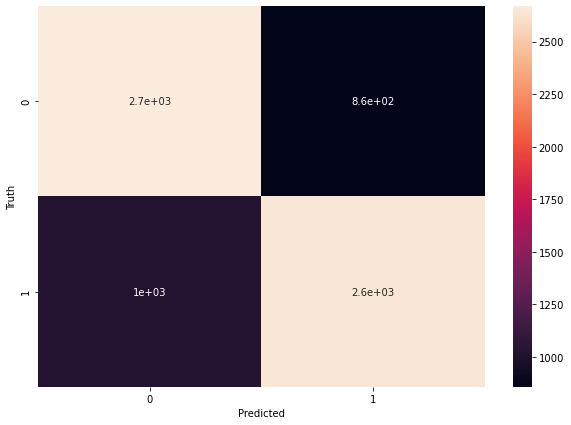

In [64]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_LogReg, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_LogReg))

              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74      3525
         1.0       0.76      0.72      0.74      3666

    accuracy                           0.74      7191
   macro avg       0.74      0.74      0.74      7191
weighted avg       0.74      0.74      0.74      7191



In [66]:
#### Lets plot the ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.802


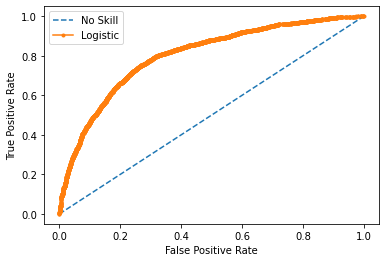

In [68]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = LogReg_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# DECISION TREE

In [69]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
DT_model = DecisionTreeClassifier(random_state = 0, criterion="gini")

In [70]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [71]:
DT_model.score(X_test,y_test)

0.7596996245306633

In [76]:
y_predict_DT = DT_model.predict(X_test)

In [77]:
cm_DT = confusion_matrix(y_test, y_predict_DT)
cm_DT

array([[2633,  892],
       [ 836, 2830]], dtype=int64)

Text(69.0, 0.5, 'Truth')

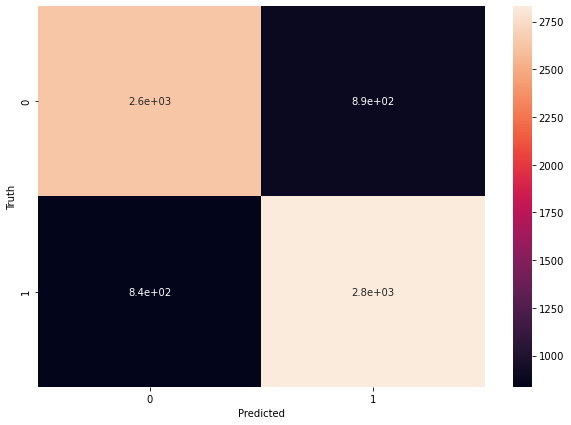

In [78]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_DT, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [79]:
print(classification_report(y_test, y_predict_DT))

              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75      3525
         1.0       0.76      0.77      0.77      3666

    accuracy                           0.76      7191
   macro avg       0.76      0.76      0.76      7191
weighted avg       0.76      0.76      0.76      7191



# RANDOM FORESTS

In [80]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier( random_state = 0,n_estimators=100)

In [81]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [82]:
RF_model.score(X_test,y_test)

0.7801418439716312

In [83]:
y_predict_RF = RF_model.predict(X_test)

In [84]:
cm_RF = confusion_matrix(y_test, y_predict_RF)
cm_RF

array([[2745,  780],
       [ 801, 2865]], dtype=int64)

Text(69.0, 0.5, 'Truth')

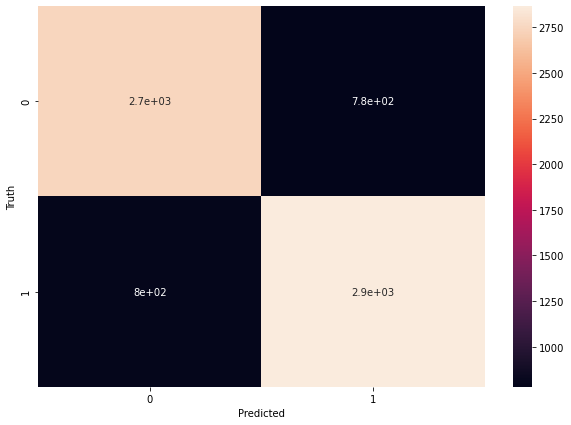

In [85]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_RF, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
print(classification_report(y_test, y_predict_RF))

              precision    recall  f1-score   support

         0.0       0.77      0.78      0.78      3525
         1.0       0.79      0.78      0.78      3666

    accuracy                           0.78      7191
   macro avg       0.78      0.78      0.78      7191
weighted avg       0.78      0.78      0.78      7191



# XGBOOST

In [88]:
import xgboost as xgb
XG_model = xgb.XGBClassifier()
XG_model.fit(X_train, y_train)

C:\Users\Aditya Mathew\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:21:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
XG_model.score(X_test,y_test)

0.8226950354609929

In [90]:
y_pred_XG = XG_model.predict(X_test)

In [91]:
cm_XG = confusion_matrix(y_test, y_pred_XG)
cm_XG

Text(69.0, 0.5, 'Truth')

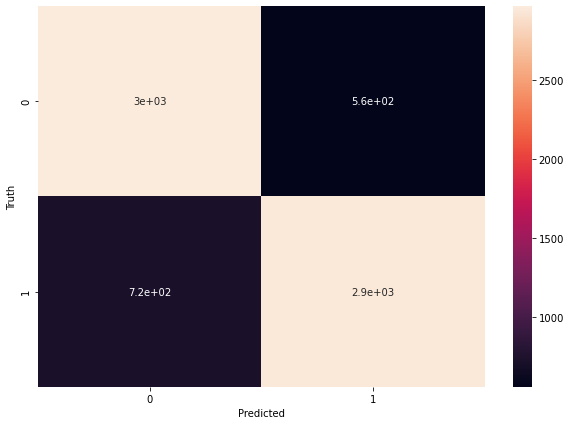

In [92]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_XG, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [96]:
print(classification_report(y_test, y_pred_XG))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82      3525
         1.0       0.84      0.80      0.82      3666

    accuracy                           0.82      7191
   macro avg       0.82      0.82      0.82      7191
weighted avg       0.82      0.82      0.82      7191



# K-FOLD METHOD

In [87]:
from sklearn.model_selection import cross_val_score
accuracy_train = cross_val_score(estimator=RF_model, X=X_train, y = y_train, cv=20)
accuracy_test = cross_val_score(estimator=RF_model, X=X_test, y = y_test, cv=20)
print(accuracy_train)
print(accuracy_test)

[0.74884152 0.77757183 0.75625579 0.78035218 0.77386469 0.78683967
 0.77849861 0.77664504 0.77664504 0.7905468  0.79147359 0.77643785
 0.7690167  0.77087199 0.77829314 0.80890538 0.79128015 0.78664193
 0.77922078 0.783859  ]
[0.75       0.76111111 0.77222222 0.74444444 0.75555556 0.76666667
 0.75555556 0.73333333 0.70833333 0.75833333 0.775      0.74930362
 0.78830084 0.73537604 0.71309192 0.79108635 0.81337047 0.73537604
 0.73816156 0.74651811]


#     MODEL  AND THEIR ACCURACY

#  LOGISTIC REGRESSION :- 73.8%

#  DECISION TREE :- 75.9%

#  RANDOM FOREST :- 78%

#  XGBOOST :- 82%

#  K-FOLD :- TRAINING : 80.8% , TEST : 81.33%

In [ ]:
# TRAINING ACCURACY 80.8% AND TESTING ACCURACY 81.33%

# TESTING WITH SAMPLE TEST FILE

In [97]:
df_test = pd.read_csv('aug_test.csv')
df_test.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15


In [98]:
df_test.shape

(2129, 13)

In [99]:
df_test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [101]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [105]:
df_test.drop(df_test.columns[[0, 1, 9, 10]], axis = 1, inplace = True)

In [106]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2129 non-null   float64
 1   gender                  1621 non-null   object 
 2   relevent_experience     2129 non-null   object 
 3   enrolled_university     2098 non-null   object 
 4   education_level         2077 non-null   object 
 5   major_discipline        1817 non-null   object 
 6   experience              2124 non-null   object 
 7   last_new_job            2089 non-null   object 
 8   training_hours          2129 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 149.8+ KB


In [107]:
print("Gender              : ",df_test.gender.unique())
print("relevent_experience : ",df_test.relevent_experience.unique())
print("enrolled_university : ",df_test.enrolled_university.unique())
print("education_level     : ",df_test.education_level.unique())
print("major_discipline    : ",df_test.major_discipline.unique())
print("experience          : ",df_test.experience.unique())
print("last_new_job        : ",df_test.last_new_job.unique())

Gender              :  ['Male' 'Female' nan 'Other']
relevent_experience :  ['Has relevent experience' 'No relevent experience']
enrolled_university :  ['Full time course' 'no_enrollment' 'Part time course' nan]
education_level     :  ['Graduate' 'High School' 'Masters' nan 'Phd' 'Primary School']
major_discipline    :  ['STEM' nan 'Other' 'Business Degree' 'Arts' 'Humanities' 'No Major']
experience          :  ['9' '5' '<1' '11' '>20' '10' '14' '3' '20' '8' '4' '13' '2' '6' '7' '1'
 '19' '15' '16' nan '17' '18' '12']
last_new_job        :  ['1' 'never' '>4' '2' '4' '3' nan]


In [111]:
print(df_test.gender.unique())
print("####################################")
print(df_test.gender.value_counts())
print("####################################")
print("Gender missing values :",df_test.gender.isna().sum())
df_test['gender'].fillna("Male",inplace = True)
print(df_test.gender.unique())
print("####################################")
print(df_test.gender.value_counts())
print("####################################")
print("Gender missing values :",df_test.gender.isna().sum())
print(df_test.enrolled_university.unique())
print("####################################")
print(df_test.enrolled_university.value_counts())
print("####################################")
print("Gender missing values :",df_test.enrolled_university.isna().sum())
df_test['enrolled_university'].fillna("no_enrollment",inplace = True)
print(df_test.enrolled_university.unique())
print("####################################")
print(df_test.enrolled_university.value_counts())
print("####################################")
print("Gender missing values :",df_test.enrolled_university.isna().sum())
print(df_test.education_level.unique())
print("####################################")
print(df_test.education_level.value_counts())
print("####################################")
print("Gender missing values :",df_test.education_level.isna().sum())
df_test['education_level'].fillna("Graduate",inplace = True)
print(df_test.education_level.unique())
print("####################################")
print(df_test.education_level.value_counts())
print("####################################")
print("Gender missing values :",df_test.education_level.isna().sum())
print(df_test.major_discipline.unique())
print("####################################")
print(df_test.major_discipline.value_counts())
print("####################################")
print("Gender missing values :",df_test.major_discipline.isna().sum())
df_test['major_discipline'].fillna("STEM",inplace = True)
print(df_test.major_discipline.unique())
print("####################################")
print(df_test.major_discipline.value_counts())
print("####################################")
print("Gender missing values :",df_test.major_discipline.isna().sum())
print(df_test.experience.unique())
print("####################################")
print(df_test.experience.value_counts())
print("####################################")
print("Gender missing values :",df_test.experience.isna().sum())
df_test['experience'].fillna(">20",inplace = True)
print(df_test.experience.unique())
print("####################################")
print(df_test.experience.value_counts())
print("####################################")
print("Gender missing values :",df_test.experience.isna().sum())
print(df_test.last_new_job.unique())
print("####################################")
print(df_test.last_new_job.value_counts())
print("####################################")
print("Gender missing values :",df_test.last_new_job.isna().sum())
df_test['last_new_job'].fillna("1",inplace = True)
print(df_test.last_new_job.unique())
print("####################################")
print(df_test.last_new_job.value_counts())
print("####################################")
print("Gender missing values :",df.last_new_job.isna().sum())

['Male' 'Female' 'Other']
####################################
Male      1968
Female     137
Other       24
Name: gender, dtype: int64
####################################
Gender missing values : 0
['Male' 'Female' 'Other']
####################################
Male      1968
Female     137
Other       24
Name: gender, dtype: int64
####################################
Gender missing values : 0
['Full time course' 'no_enrollment' 'Part time course']
####################################
no_enrollment       1550
Full time course     435
Part time course     144
Name: enrolled_university, dtype: int64
####################################
Gender missing values : 0
['Full time course' 'no_enrollment' 'Part time course']
####################################
no_enrollment       1550
Full time course     435
Part time course     144
Name: enrolled_university, dtype: int64
####################################
Gender missing values : 0
['Graduate' 'High School' 'Masters' 'Phd' 'Primary School']
##

In [113]:
print("Gender              : ",df_test.gender.unique())
print("relevent_experience : ",df_test.relevent_experience.unique())
print("enrolled_university : ",df_test.enrolled_university.unique())
print("education_level     : ",df_test.education_level.unique())
print("major_discipline    : ",df_test.major_discipline.unique())
print("experience          : ",df_test.experience.unique())
print("last_new_job        : ",df_test.last_new_job.unique())

Gender              :  ['Male' 'Female' 'Other']
relevent_experience :  ['Has relevent experience' 'No relevent experience']
enrolled_university :  ['Full time course' 'no_enrollment' 'Part time course']
education_level     :  ['Graduate' 'High School' 'Masters' 'Phd' 'Primary School']
major_discipline    :  ['STEM' 'Other' 'Business Degree' 'Arts' 'Humanities' 'No Major']
experience          :  ['9' '5' '<1' '11' '>20' '10' '14' '3' '20' '8' '4' '13' '2' '6' '7' '1'
 '19' '15' '16' '17' '18' '12']
last_new_job        :  ['1' 'never' '>4' '2' '4' '3']


In [114]:
df_test['experience'] = df_test.experience.replace({'>20':21,"<1":0})

print(type(df_test['experience'][1]))
df_test['experience'] = df_test.experience.astype('int64')
print("#########################################")
print(type(df_test['experience'][1]))

df_test['last_new_job'] = df_test.last_new_job.replace({'>4':5,"never":0})

print(type(df_test['last_new_job'][0]))
df_test['last_new_job'] = df_test.last_new_job.astype('int64')
print("#########################################")
print(type(df_test['last_new_job'][0]))

<class 'str'>
#########################################
<class 'numpy.int64'>
<class 'str'>
#########################################
<class 'numpy.int64'>


In [115]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
 
df_test['gender']= label_encoder.fit_transform(df_test['gender'])
df_test['relevent_experience']= label_encoder.fit_transform(df_test['relevent_experience'])
df_test['enrolled_university']= label_encoder.fit_transform(df_test['enrolled_university'])
df_test['education_level']= label_encoder.fit_transform(df_test['education_level'])
df_test['major_discipline']= label_encoder.fit_transform(df_test['major_discipline'])

print("Gender              : ",df_test.gender.unique())
print("relevent_experience : ",df_test.relevent_experience.unique())
print("enrolled_university : ",df_test.enrolled_university.unique())
print("education_level     : ",df_test.education_level.unique())
print("major_discipline    : ",df_test.major_discipline.unique())
print("experience          : ",df_test.experience.unique())
print("last_new_job        : ",df_test.last_new_job.unique())

Gender              :  [1 0 2]
relevent_experience :  [0 1]
enrolled_university :  [0 2 1]
education_level     :  [0 1 2 3 4]
major_discipline    :  [5 4 1 0 2 3]
experience          :  [ 9  5  0 11 21 10 14  3 20  8  4 13  2  6  7  1 19 15 16 17 18 12]
last_new_job        :  [1 0 5 2 4 3]


In [118]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2129 non-null   float64
 1   gender                  2129 non-null   int32  
 2   relevent_experience     2129 non-null   int32  
 3   enrolled_university     2129 non-null   int32  
 4   education_level         2129 non-null   int32  
 5   major_discipline        2129 non-null   int32  
 6   experience              2129 non-null   int64  
 7   last_new_job            2129 non-null   int64  
 8   training_hours          2129 non-null   int64  
dtypes: float64(1), int32(5), int64(3)
memory usage: 108.2 KB


In [119]:
df_test = pd.get_dummies(df_test, columns = ['gender','relevent_experience','enrolled_university','education_level','major_discipline'])
df_test.head()

,city_development_index,experience,last_new_job,training_hours,gender_0,gender_1,gender_2,relevent_experience_0,relevent_experience_1,enrolled_university_0,...,education_level_1,education_level_2,education_level_3,education_level_4,major_discipline_0,major_discipline_1,major_discipline_2,major_discipline_3,major_discipline_4,major_discipline_5
0,0.827,9,1,21,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.920,5,1,98,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.624,0,0,15,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.827,11,1,39,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.920,21,5,72,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_new_job           19158 non-null  int64  
 1   training_hours         19158 non-null  int64  
 2   target                 19158 non-null  float64
 3   gender_1               19158 non-null  uint8  
 4   gender_2               19158 non-null  uint8  
 5   relevent_experience_1  19158 non-null  uint8  
 6   enrolled_university_1  19158 non-null  uint8  
 7   education_level_2      19158 non-null  uint8  
 8   education_level_3      19158 non-null  uint8  
 9   education_level_4      19158 non-null  uint8  
 10  major_discipline_1     19158 non-null  uint8  
 11  major_discipline_2     19158 non-null  uint8  
 12  major_discipline_3     19158 non-null  uint8  
 13  major_discipline_4     19158 non-null  uint8  
 14  major_discipline_5     19158 non-null  uint8  
dtypes:

In [126]:
df_test + df['target']

0        2.0
1        0.0
2        0.0
3        2.0
4        0.0
        ... 
19153    2.0
19154    2.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [127]:
df_test

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [120]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

df_test_smote= smote.fit_resample(df_test)

TypeError: fit_resample() missing 1 required positional argument: 'y'